In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [2]:
base_path = '/content/drive/MyDrive/Internship/IDX Partners'
data_path = os.path.join(base_path, 'Dataset')

## Understanding Data

In [3]:
df = pd.read_csv(os.path.join(data_path, 'cleaned-dataset-v1.csv'))
df.drop('Unnamed: 0', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466256 entries, 0 to 466255
Data columns (total 52 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          466256 non-null  int64  
 1   member_id                   466256 non-null  int64  
 2   loan_amnt                   466256 non-null  int64  
 3   funded_amnt                 466256 non-null  int64  
 4   funded_amnt_inv             466256 non-null  float64
 5   term                        466256 non-null  object 
 6   int_rate                    466256 non-null  float64
 7   installment                 466256 non-null  float64
 8   grade                       466256 non-null  object 
 9   sub_grade                   466256 non-null  object 
 10  emp_title                   466256 non-null  object 
 11  emp_length                  466256 non-null  object 
 12  home_ownership              466256 non-null  object 
 13  annual_inc    

In [4]:
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [5]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

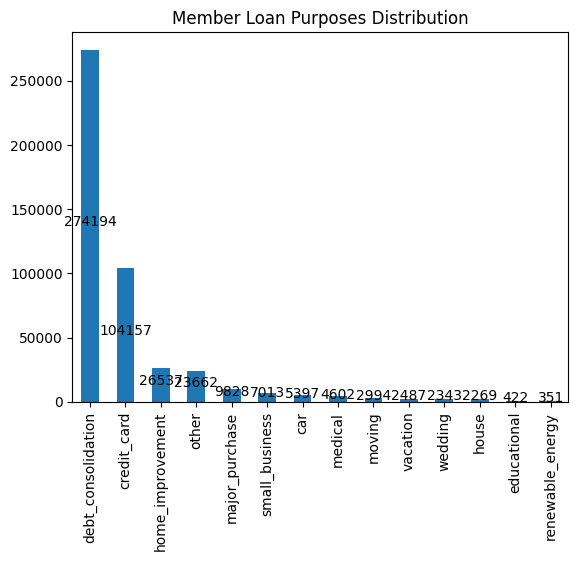

In [6]:
# Customer Segmentation 1
df['purpose'].value_counts().plot(kind='bar')
plt.title('Member Loan Purposes Distribution')
addlabels(df['purpose'].unique(), df['purpose'].value_counts())

<Axes: ylabel='emp_title'>

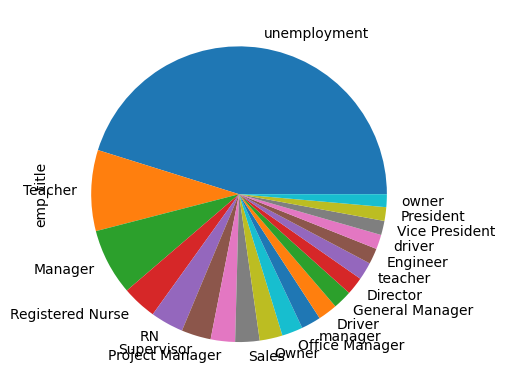

In [7]:
# Customer Segmentation 2
df['emp_title'].value_counts()[:20].plot(kind='pie')

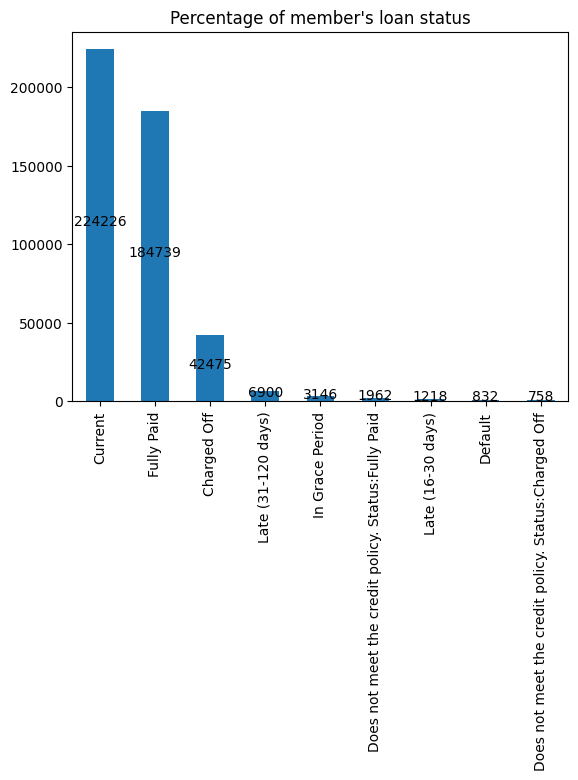

In [8]:
df['loan_status'].value_counts().plot(kind='bar')
plt.title('Percentage of member\'s loan status')
addlabels(df['loan_status'].unique(), df['loan_status'].value_counts())
plt.show()

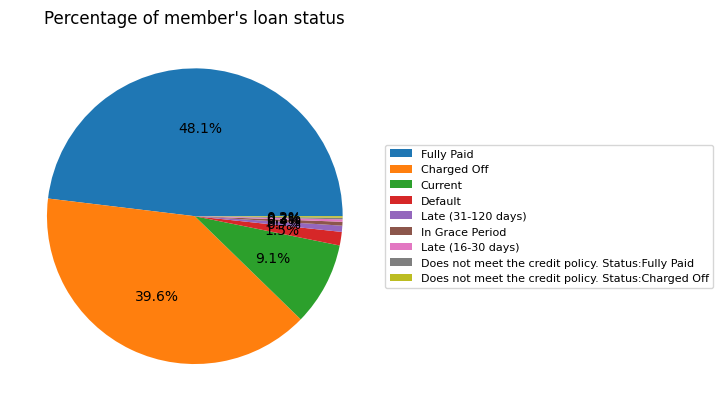

In [9]:
y = df['loan_status'].value_counts()
labels = df['loan_status'].unique()
fig, ax = plt.subplots()
ax.pie(y, autopct='%1.1f%%')
plt.title('Percentage of member\'s loan status')
plt.legend(labels=labels, loc='center left', bbox_to_anchor=(1, .5), fontsize=8)
plt.show()

## Feature Engineering

### Feature Manipulation

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466256 entries, 0 to 466255
Data columns (total 52 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          466256 non-null  int64  
 1   member_id                   466256 non-null  int64  
 2   loan_amnt                   466256 non-null  int64  
 3   funded_amnt                 466256 non-null  int64  
 4   funded_amnt_inv             466256 non-null  float64
 5   term                        466256 non-null  object 
 6   int_rate                    466256 non-null  float64
 7   installment                 466256 non-null  float64
 8   grade                       466256 non-null  object 
 9   sub_grade                   466256 non-null  object 
 10  emp_title                   466256 non-null  object 
 11  emp_length                  466256 non-null  object 
 12  home_ownership              466256 non-null  object 
 13  annual_inc    

In [11]:
# Drop the column that were categorical with large variety of value

# Drop the column that refer to identifier of the loan member
df.drop(['id', 'member_id', 'url', 'desc', 'title', 'addr_state', 'zip_code'], axis=1, inplace=True)
df.drop(['issue_d', 'sub_grade', 'purpose', 'earliest_cr_line'], axis=1, inplace=True)

df['term'] = df['term'].apply(lambda x: x.strip().split()[0]).astype('int')

In [12]:
df['emp_length'].unique()
length_to_year = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10,
}

df['emp_length'] = df['emp_length'].apply(lambda x: length_to_year[x]).astype('int')
df['emp_length']

0         10
1          0
2         10
3         10
4          1
          ..
466251     4
466252    10
466253     7
466254     3
466255    10
Name: emp_length, Length: 466256, dtype: int64

In [13]:
df['grade'].unique()
encode_grade = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
}

decode_grade = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E',
    5: 'F',
    6: 'G',
}

df['grade'] = df['grade'].apply(lambda x: encode_grade[x]).astype('int')
df['grade']

0         1
1         2
2         2
3         2
4         1
         ..
466251    2
466252    3
466253    3
466254    0
466255    3
Name: grade, Length: 466256, dtype: int64

In [14]:
df['verification_status'].unique()

encode_verification_status = {
    'Not Verified': 0,
    'Source Verified': 1,
    'Verified': 2,
}

decode_verification_status = {
    0: 'Not Verified',
    1: 'Source Verified',
    2: 'Verified',
}

df['verification_status'] = df['verification_status'].apply(lambda x: encode_verification_status[x]).astype('int')
df['verification_status']

0         2
1         1
2         0
3         1
4         1
         ..
466251    1
466252    2
466253    2
466254    2
466255    2
Name: verification_status, Length: 466256, dtype: int64

In [15]:
df['pymnt_plan'].unique()

encode_pymnt_plan = {
    'y': 1,
    'n': 0
}

decode_pymnt_plan = {
    1: 'y',
    0: 'n'
}

df['pymnt_plan'] = df['pymnt_plan'].apply(lambda x: encode_pymnt_plan[x]).astype('int')

In [16]:
df['initial_list_status'].unique()

encode_initial_list_status = {
    'w': 1,
    'f': 0
}

df['initial_list_status'] = df['initial_list_status'].apply(lambda x: encode_initial_list_status[x]).astype('int')

In [17]:
df['home_ownership'].unique()

encode_home_ownership = {
    'RENT': 0,
    'OWN': 1,
    'MORTGAGE': 2,
    'OTHER': 3,
    'NONE': 4,
    'ANY': 5,
}

decode_home_ownership = {
    0: 'RENT',
    1: 'OWN',
    2: 'MORTGAGE',
    3: 'OTHER',
    4: 'NONE',
    5: 'ANY',
}

df['home_ownership'] = df['home_ownership'].apply(lambda x: encode_home_ownership[x]).astype('int')
df['home_ownership']

0         0
1         0
2         0
3         0
4         0
         ..
466251    2
466252    2
466253    2
466254    1
466255    2
Name: home_ownership, Length: 466256, dtype: int64

In [18]:
# change the value of emp_title column due to large variety of value
conditions = [
    df['emp_title'] == 'unemployment',
    df['emp_title'] != 'unemployment',
]
outputs = [
    0, 1
]

df['employed'] = np.select(conditions, outputs)
df.drop(['emp_title'], axis=1, inplace=True)

In [30]:
decode_employed = {
    1: 'employed',
    0: 'unemployed'
}

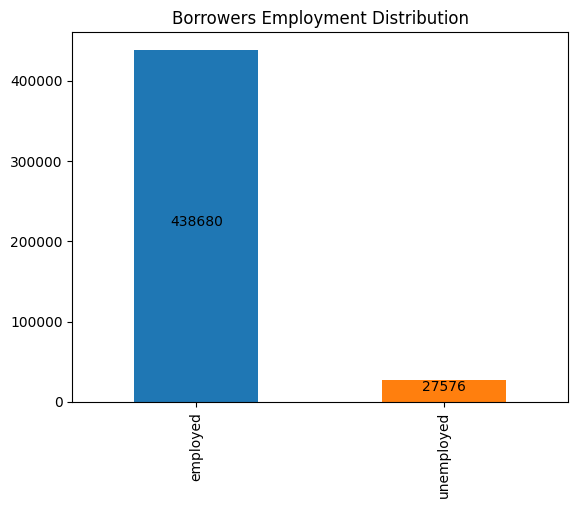

In [31]:
# Member loan risk assessment distribution
df['employed'].apply(lambda x: decode_employed[x]).value_counts().plot(kind='bar', color=['C0', 'C1'])
plt.title('Borrowers Employment Distribution')
addlabels(df['employed'].unique(), sorted(df['employed'].value_counts(), reverse=True))

<ipython-input-34-c1e34d5ed1f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['employed'] = df_group['employed'].apply(lambda x: decode_employed[x])


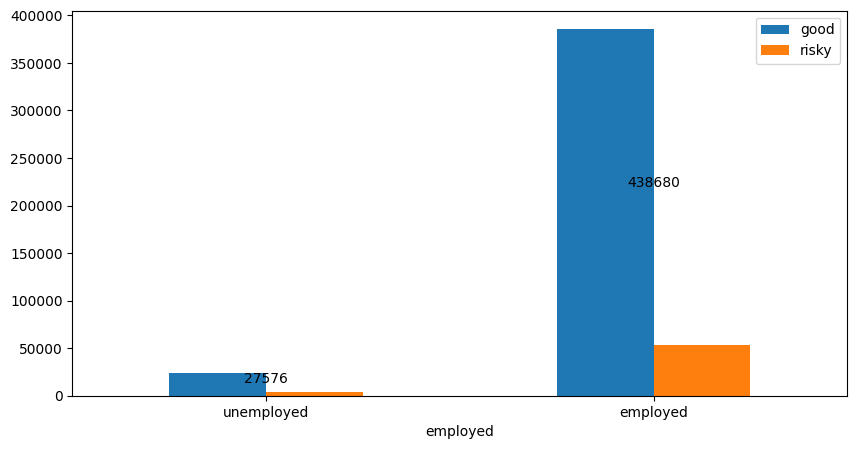

In [34]:
# find the total number of loan status of employee with each length of working experience

df_group = df[['employed', 'risk_assessment']]
df_group['employed'] = df_group['employed'].apply(lambda x: decode_employed[x])

df_group_total = df_group.groupby('employed').count()
df_group_pos = df_group.groupby('employed').sum()
df_group_neg = df_group_total - df_group_pos

df_copy = pd.DataFrame({'good': (np.array(df_group_pos).reshape(2,)),
                   'risky': (np.array(df_group_neg).reshape(2,))}, index=df_group_total.index).sort_values(by=['good'])

ax = df_copy.plot.bar(rot=0, figsize=(10, 5))
addlabels(df['employed'].unique(), sorted(df['employed'].value_counts(), reverse=False))

In [39]:
df['annual_inc'].describe()


count    4.662560e+05
mean     7.327749e+04
std      5.496301e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.895150e+04
max      7.500000e+06
Name: annual_inc, dtype: float64

In [40]:
df[df['annual_inc'] == df['annual_inc'].max()]['annual_inc']

325156    7500000.0
Name: annual_inc, dtype: float64

In [44]:

# Determine the good and risky loan status
conditions = [
    df['annual_inc'] <= 1e+4,
    df['annual_inc'] <= 1e+5,
    df['annual_inc'] <= 1e+6,
    df['annual_inc'] <= 1e+7,

]
outputs = [
    '> 1,000',
    '> 10,000',
    '> 100,000',
    '> 1,000,000',
]

df['annual_income'] = np.select(conditions, outputs)

Text(0.5, 1.0, "Borrower's Annual Income")

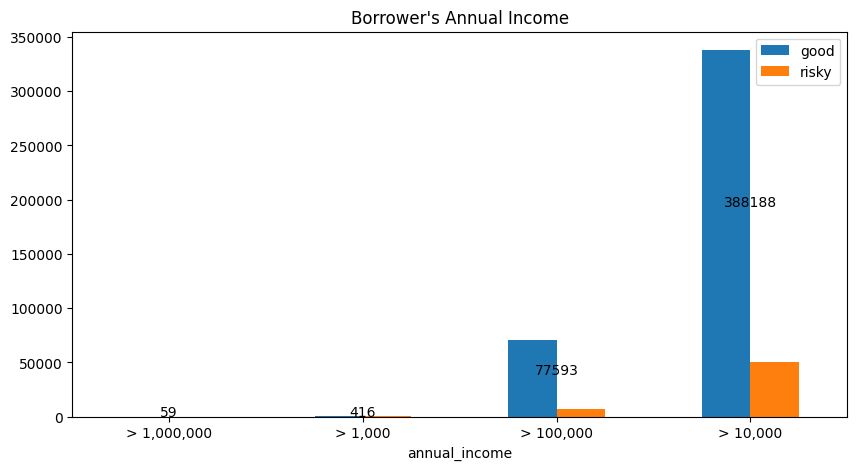

In [47]:
# df['home_ownership'].value_counts().plot(kind='bar')

df_group = df[['annual_income', 'risk_assessment']]

df_group_total = df_group.groupby('annual_income').count()
df_group_pos = df_group.groupby('annual_income').sum()
df_group_neg = df_group_total - df_group_pos

df_copy = pd.DataFrame({'good': (np.array(df_group_pos).reshape(4,)),
                   'risky': (np.array(df_group_neg).reshape(4,))}, index=df_group_total.index).sort_values(by=['good'])

ax = df_copy.plot.bar(rot=0, figsize=(10, 5))
addlabels(df['annual_income'].unique(), sorted(df['annual_income'].value_counts(), reverse=False))
plt.title('Borrower\'s Annual Income')

In [19]:
# Determine the good and risky loan status
conditions = [
    df['loan_status'] == 'Fully Paid',
    df['loan_status'] == 'Charged Off',
    df['loan_status'] == 'Current',
    df['loan_status'] == 'Default',
    df['loan_status'] == 'In Grace Period',
    df['loan_status'] == 'Late (31-120 days)',
    df['loan_status'] == 'Late (16-30 days)',
    df['loan_status'] == 'Does not meet the credit policy. Status: Fully Paid',
    df['loan_status'] == 'Does not meet the credit policy. Status: Charged Off',
]
outputs = [
    1, 0, 1, 0, 0, 0, 0, 1, 0
]

df['risk_assessment'] = np.select(conditions, outputs)
df.drop(['loan_status'], axis=1, inplace=True)

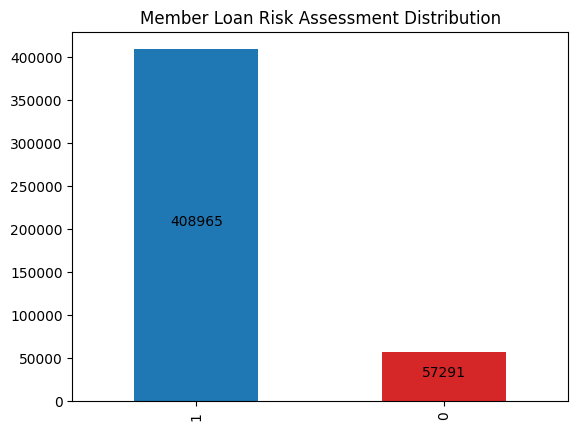

In [24]:
# Member loan risk assessment distribution
df['risk_assessment'].value_counts().plot(kind='bar', color=['C0', 'C3'])
plt.title('Member Loan Risk Assessment Distribution')
addlabels(df['risk_assessment'].unique(), sorted(df['risk_assessment'].value_counts(), reverse=True))

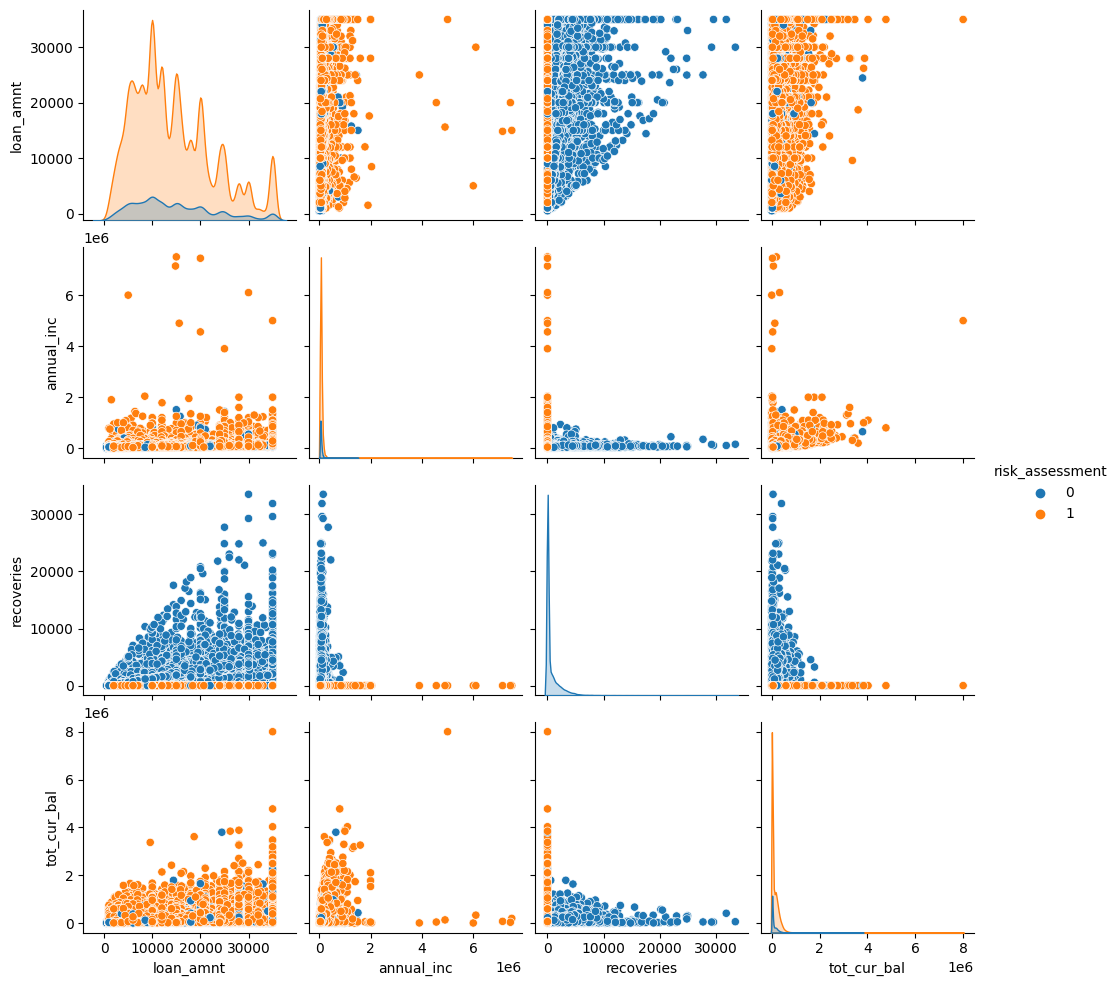

In [ ]:
sns.pairplot(df, vars=['loan_amnt', 'annual_inc', 'recoveries', 'tot_cur_bal'], hue='risk_assessment')
plt.show()

<ipython-input-184-a6167cf1a526>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['home_ownership'] = df_group['home_ownership'].apply(lambda x: decode_home_ownership[x])


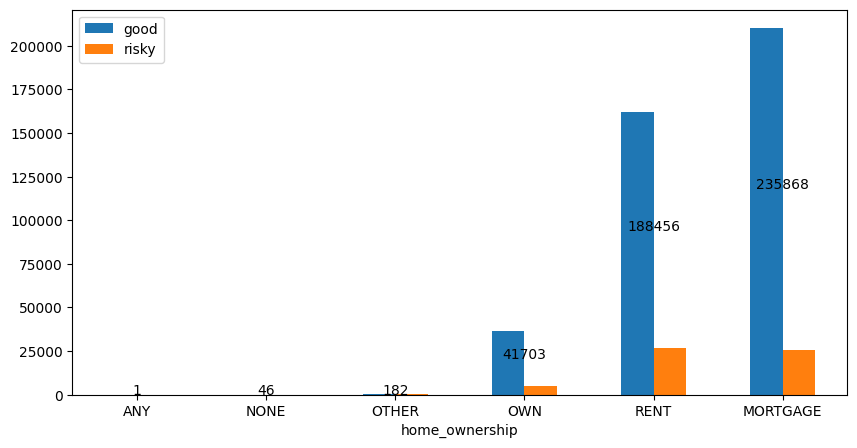

In [ ]:
# df['home_ownership'].value_counts().plot(kind='bar')

df_group = df[['home_ownership', 'risk_assessment']]
df_group['home_ownership'] = df_group['home_ownership'].apply(lambda x: decode_home_ownership[x])

df_group_total = df_group.groupby('home_ownership').count()
df_group_pos = df_group.groupby('home_ownership').sum()
df_group_neg = df_group_total - df_group_pos

df_copy = pd.DataFrame({'good': (np.array(df_group_pos).reshape(6,)),
                   'risky': (np.array(df_group_neg).reshape(6,))}, index=df_group_total.index).sort_values(by=['good'])

ax = df_copy.plot.bar(rot=0, figsize=(10, 5))
addlabels(df['home_ownership'].unique(), sorted(df['home_ownership'].value_counts(), reverse=False))

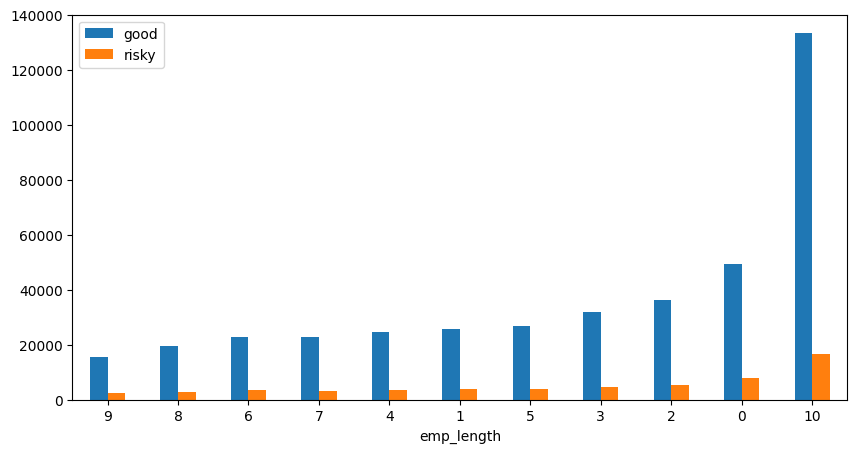

In [ ]:
# find the total number of loan status of employee with each length of working experience

df_group = df[['emp_length', 'risk_assessment']]

df_group_total = df_group.groupby('emp_length').count()
df_group_pos = df_group.groupby('emp_length').sum()
df_group_neg = df_group_total - df_group_pos

df_copy = pd.DataFrame({'good': (np.array(df_group_pos).reshape(11,)),
                   'risky': (np.array(df_group_neg).reshape(11,))}, index=df_group_total.index).sort_values(by=['good'])

ax = df_copy.plot.bar(rot=0, figsize=(10, 5))

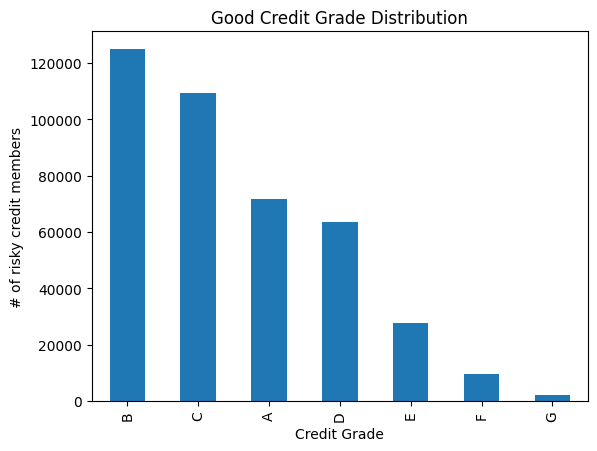

In [ ]:
df[df['risk_assessment'] == 1]['grade'].apply(lambda x: decode_grade[x]).value_counts().plot(kind='bar')
plt.title('Good Credit Grade Distribution')
plt.xlabel('Credit Grade')
plt.ylabel('# of risky credit members')
plt.show()

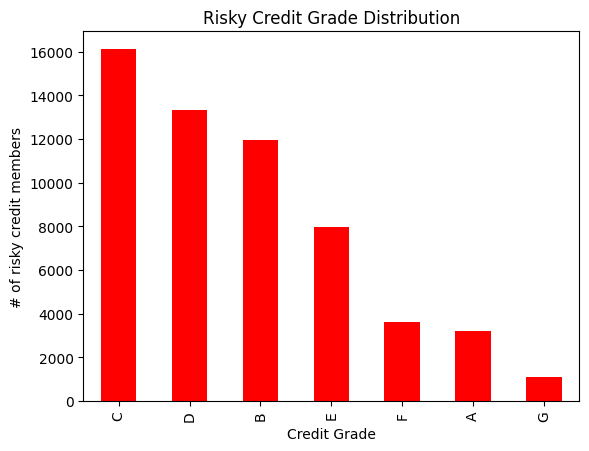

In [ ]:
df[df['risk_assessment'] == 0]['grade'].apply(lambda x: decode_grade[x]).value_counts().plot(kind='bar', color='red')
plt.title('Risky Credit Grade Distribution')
plt.xlabel('Credit Grade')
plt.ylabel('# of risky credit members')
plt.show()

<ipython-input-27-21014b91c949>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['grade'] = df_group['grade'].apply(lambda x: decode_grade[x])


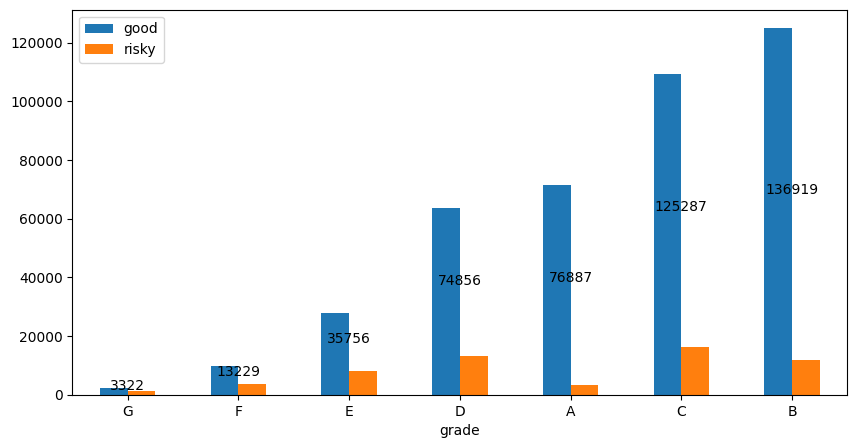

In [27]:
# find the total number of loan status of employee with each length of working experience

df_group = df[['grade', 'risk_assessment']]
df_group['grade'] = df_group['grade'].apply(lambda x: decode_grade[x])

df_group_total = df_group.groupby('grade').count()
df_group_pos = df_group.groupby('grade').sum()
df_group_neg = df_group_total - df_group_pos

df_copy = pd.DataFrame({'good': (np.array(df_group_pos).reshape(7,)),
                   'risky': (np.array(df_group_neg).reshape(7,))}, index=df_group_total.index).sort_values(by=['good'])

ax = df_copy.plot.bar(rot=0, figsize=(10, 5))
addlabels(df['grade'].unique(), sorted(df['grade'].value_counts(), reverse=False))

<ipython-input-188-b0621095df87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['verification_status'] = df_group['verification_status'].apply(lambda x: decode_verification_status[x])


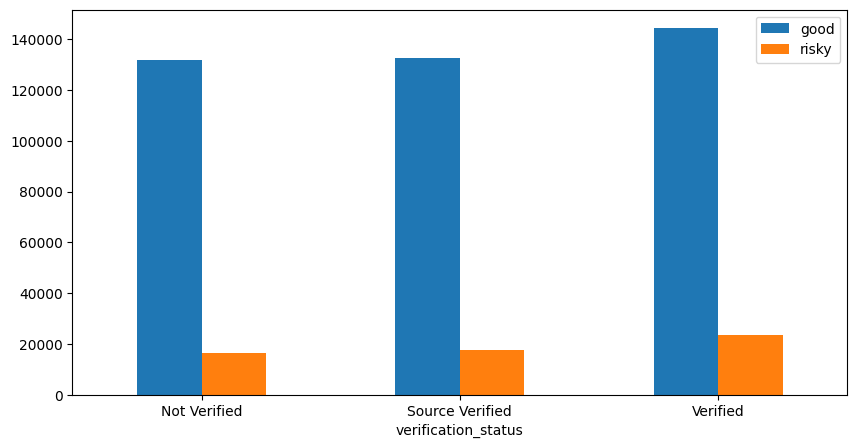

In [ ]:
df_group = df[['verification_status', 'risk_assessment']]
df_group['verification_status'] = df_group['verification_status'].apply(lambda x: decode_verification_status[x])

df_group_total = df_group.groupby('verification_status').count()
df_group_pos = df_group.groupby('verification_status').sum()
df_group_neg = df_group_total - df_group_pos

df_copy = pd.DataFrame({'good': (np.array(df_group_pos).reshape(3,)),
                   'risky': (np.array(df_group_neg).reshape(3,))}, index=df_group_total.index).sort_values(by=['good'])

ax = df_copy.plot.bar(rot=0, figsize=(10, 5))

<Axes: xlabel='installment', ylabel='tot_cur_bal'>

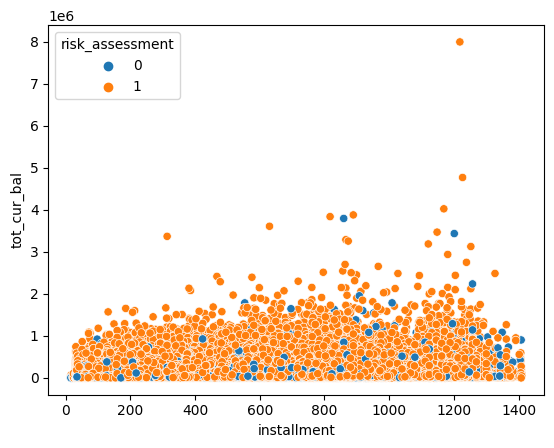

In [ ]:
sns.scatterplot(x="installment",
                    y="tot_cur_bal",
                    data=df,
                    hue='risk_assessment'
                )

<Axes: xlabel='recoveries', ylabel='tot_cur_bal'>

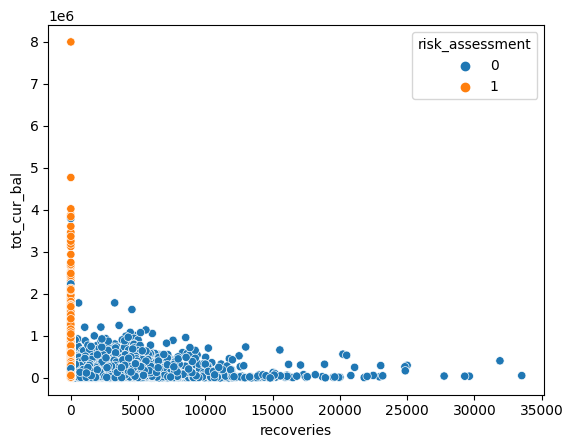

In [ ]:
sns.scatterplot(x="recoveries",
                    y="tot_cur_bal",
                    data=df,
                    hue='risk_assessment'
                )

<Axes: xlabel='recoveries', ylabel='annual_inc'>

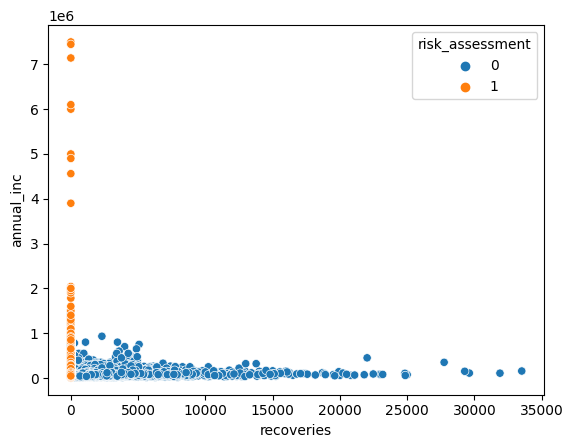

In [ ]:
sns.scatterplot(x="recoveries",
                    y="annual_inc",
                    data=df,
                    hue='risk_assessment'
                )

<Axes: xlabel='tot_cur_bal', ylabel='annual_inc'>

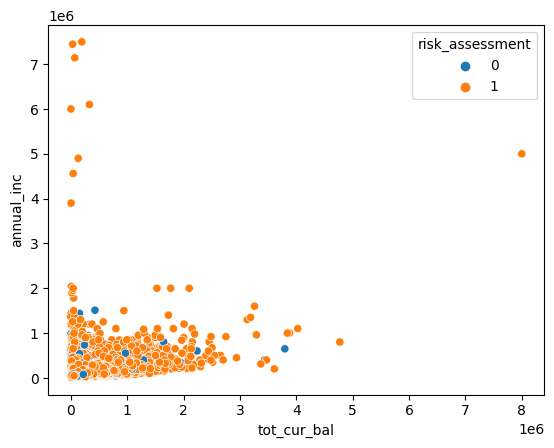

In [32]:
sns.scatterplot(x="tot_cur_bal",
                    y="annual_inc",
                    data=df,
                    hue='risk_assessment'
                )

<Axes: xlabel='installment', ylabel='annual_inc'>

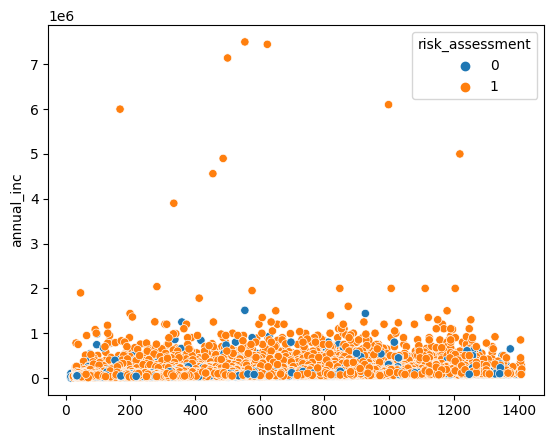

In [35]:
sns.scatterplot(x="installment",
                    y="annual_inc",
                    data=df,
                    hue='risk_assessment'
                )

<Axes: >

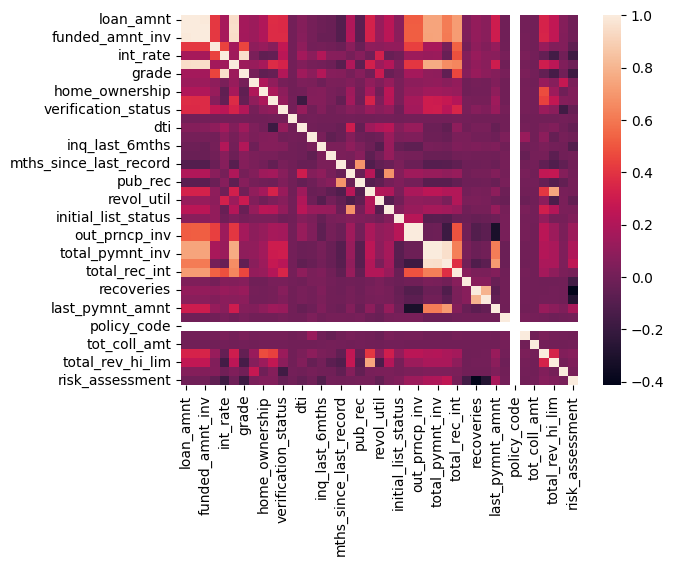

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466256 entries, 0 to 466255
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466256 non-null  int64  
 1   funded_amnt                 466256 non-null  int64  
 2   funded_amnt_inv             466256 non-null  float64
 3   term                        466256 non-null  int64  
 4   int_rate                    466256 non-null  float64
 5   installment                 466256 non-null  float64
 6   grade                       466256 non-null  int64  
 7   emp_length                  466256 non-null  int64  
 8   home_ownership              466256 non-null  int64  
 9   annual_inc                  466256 non-null  float64
 10  verification_status         466256 non-null  int64  
 11  pymnt_plan                  466256 non-null  int64  
 12  dti                         466256 non-null  float64
 13  delinq_2yrs   

### Feature Importance

Feature: 0 loan_amnt, Score: 0.013859774771606319
Feature: 1 funded_amnt, Score: 0.11673440299815746
Feature: 2 funded_amnt_inv, Score: 0.008536149831145803
Feature: 3 term, Score: 0.0006815498212474601
Feature: 4 int_rate, Score: 0.009959832508382132
Feature: 5 installment, Score: 0.010311056799298146
Feature: 6 grade, Score: 0.0030290013340814846
Feature: 7 emp_length, Score: 0.0047632103577244815
Feature: 8 home_ownership, Score: 0.0016350560791086946
Feature: 9 annual_inc, Score: 0.011528828626880521
Feature: 10 verification_status, Score: 0.0022382421069306073
Feature: 11 pymnt_plan, Score: 2.9968227544415523e-06
Feature: 12 dti, Score: 0.014003600875601506
Feature: 13 delinq_2yrs, Score: 0.002820853199640082
Feature: 14 inq_last_6mths, Score: 0.01427885651329579
Feature: 15 mths_since_last_delinq, Score: 0.00699233738898849
Feature: 16 mths_since_last_record, Score: 0.003422468261147258
Feature: 17 open_acc, Score: 0.007816055811594473
Feature: 18 pub_rec, Score: 0.00106514905921

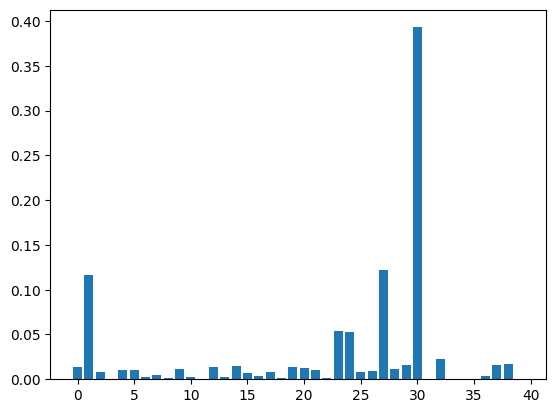

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print(f'Feature: {i} {df.columns[i]}, Score: {v}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0 loan_amnt, Score: 0.004005026027534992
Feature: 1 funded_amnt, Score: 0.13053535761100782
Feature: 2 funded_amnt_inv, Score: 0.00723039065053058
Feature: 3 term, Score: 0.0007557021049590056
Feature: 4 int_rate, Score: 0.010078404454464089
Feature: 5 installment, Score: 0.009028145737476706
Feature: 6 grade, Score: 0.003308635277761429
Feature: 7 emp_length, Score: 0.005391725133166051
Feature: 8 home_ownership, Score: 0.001787711615530293
Feature: 9 annual_inc, Score: 0.011972038795806396
Feature: 10 verification_status, Score: 0.0022406923987846094
Feature: 11 pymnt_plan, Score: 0.0
Feature: 12 dti, Score: 0.014044015169516165
Feature: 13 delinq_2yrs, Score: 0.0022477833362698693
Feature: 14 inq_last_6mths, Score: 0.014526226012137091
Feature: 15 mths_since_last_delinq, Score: 0.007022907674848949
Feature: 16 mths_since_last_record, Score: 0.0031095276858232658
Feature: 17 open_acc, Score: 0.008697337361921062
Feature: 18 pub_rec, Score: 0.0008598547373010961
Feature: 19 r

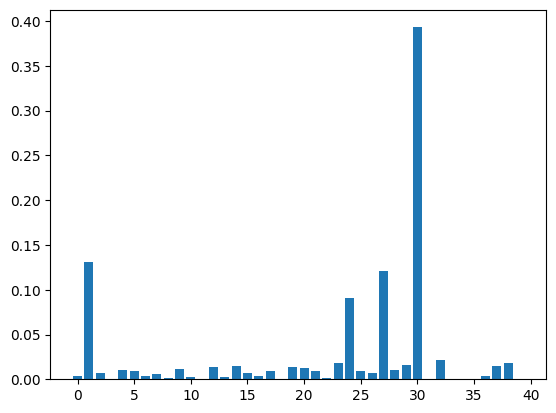

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print(f'Feature: {i} {df.columns[i]}, Score: {v}')
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
df.to_csv(os.path.join(data_path, 'cleaned-model-v1.csv'))